# Team 4A Project: TS Advisor

## Load data

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

df_ts_advisor = pd.read_csv('../Project_4_TS_Advisor/4G5G_trs_15500.csv', sep=';')
df_ts_advisor
df_ts_advisor.columns

df_ts_advisor.head()

,General.Eriref,Faulty product.Design Responsible MHO,General.Submitter priority,General.Heading,Observation.Observation,Answer.Answer,General.Is duplicate TR,General.Primary TR,General.Duplicate TRs,TR History Register.Register date,General.Superior MHO,General.Status code
0,HY67016,TC-SW,B,"KDDI CD MTR20.39 IE ""Connected en-gNB to be Ad...",1.1 Trouble summary and/or commercial ...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2020-10-12,LTE-MS-RBS,FI
1,HY67017,CAT-CRA,B,"CMCC Radio 8863 FFI: Alarm ""Resource Configur...",1 E F F E C T\n============\n1.1 Trouble su...,CAUSE OF FAULT\n------------------------------...,True,HY63102,NaN,2020-10-12,LTE-MS-RBS,FI
2,HY67021,NR-SYSTEM,B,CD MTR 20.41 NR Active Drop KPI reduction MTR2...,1 E F F E C T \n============\n1.1 Trouble s...,CAUSE OF FAULT\n------------------------------...,False,NaN,NaN,2020-10-12,LTE-MS-RBS,FI
3,HY67029,NR-EMCASW,B,MR8016 SP11 It's occur the crash when I operat...,1 E F F E C T \n============\n1.1\tTrouble sum...,"<REPLACE TEXT IN ""< >"" with the relevant info...",True,HY66591,NaN,2020-10-12,BBSUPER,FI
4,HY67032,NR-EMCASW,B,eFIT NR NSA MB: DU EMCA crashes after bl/deb c...,1 E F F E C T \n============\n1.1\tTrouble sum...,"<REPLACE TEXT IN ""< >"" with the relevant info...",True,HY66591,NaN,2020-10-12,BBSUPER,FI


## Data Exploration

In [4]:
for i in range(5):
    print('\t\t\t\t\t\t', '[', (i + 1), ']', '\n\n\n')
    print(df_ts_advisor['General.Heading'][i])
    print('\n', '#' * 100,'\n')
    print(df_ts_advisor['Observation.Observation'][i])
    print('\n', '#' * 100,'\n')
    print(df_ts_advisor['Answer.Answer'][i])
    print('\n', '#' * 100,'\n\n\n')

						 [ 1 ] 



KDDI CD MTR20.39 IE "Connected en-gNB to be Added List" is included in ENB CONFIGURATION UPDATE on S1AP message with changing CA

 #################################################################################################### 

1.1         Trouble summary and/or commercial effect
-----------------------------------------------------------------------
IE "Connected en-gNB to be Added List" is included in ENB CONFIGURATION UPDATE on S1AP message.
1.2 Last working SW version (Upgrade Package or Lm etc), where the fault has NOT been seen
----------------------------------------------------------------------------------------
N/A
 
1.3 Observed System impact
----------------------------------------
Other vendor (Hitachi) MME rejected the message and re-setup the S1 interface.
1.4. Conditions
-----------------------
Confirmed SW:MTR20.39(CXP9024418/15_R17B30)
After changing the TAC to 45729 from 52155, eNB sent ENB CONFIGURATION UPDATE to MME with IE "Connected en-gNB 

In [3]:
df_ts_advisor.isnull().sum()

General.Eriref                               0
Faulty product.Design Responsible MHO        0
General.Submitter priority                   0
General.Heading                              0
Observation.Observation                      4
Answer.Answer                               48
General.Is duplicate TR                      0
General.Primary TR                       12630
General.Duplicate TRs                    12748
TR History Register.Register date            0
General.Superior MHO                         4
General.Status code                          0
dtype: int64

In [6]:
df_ts_advisor_filtered = df_ts_advisor[df_ts_advisor['General.Duplicate TRs'].isnull()]
df_ts_advisor_filtered.shape

(12748, 12)

In [7]:
df_ts_advisor_duplicates = df_ts_advisor_filtered[
    df_ts_advisor_filtered['General.Is duplicate TR'] == True]
df_ts_advisor_duplicates.shape

(2870, 12)

In [8]:
df_ts_advisor_uniques = df_ts_advisor_filtered[
    df_ts_advisor_filtered['General.Is duplicate TR'] == False]
df_ts_advisor_uniques.shape

(9878, 12)

In [7]:
df_ts_advisor_duplicates = df_ts_advisor[df_ts_advisor['General.Is duplicate TR'] == True]
df_ts_advisor_duplicates.shape

(2870, 12)

In [8]:
df_ts_advisor_uniques = df_ts_advisor[df_ts_advisor['General.Is duplicate TR'] == False]
df_ts_advisor_uniques.shape

(12630, 12)

In [9]:
df_ts_advisor_uniques[df_ts_advisor_uniques['General.Duplicate TRs'].notnull()].shape

(2752, 12)

In [10]:
12630 - 2752

9878

## Filter duplicates 

In [9]:
df = df_ts_advisor
df = df[df['General.Duplicate TRs'].isnull()]
df_ts_advisor_uniques = df.drop(df[df['General.Is duplicate TR'] == True].index)
df_ts_advisor_uniques.shape

(9878, 12)

## Remove null/empty

In [10]:
df = df_ts_advisor_uniques
df = df.drop(df[df['Observation.Observation'].isnull()].index)
df = df.drop(df[df['Answer.Answer'].isnull()].index)
df = df.drop(df[df['Faulty product.Design Responsible MHO'].isnull()].index)
df_ts_advisor_filtered = df.reset_index(drop=True)
df_ts_advisor_filtered.shape

(9853, 12)

In [200]:
(df_ts_advisor['General.Primary TR'])

0         Uknown
1        HY63102
2         Uknown
3        HY66591
4        HY66591
          ...   
15495     Uknown
15496     Uknown
15497     Uknown
15498     Uknown
15499     Uknown
Name: General.Primary TR, Length: 15500, dtype: object

In [199]:
(df_ts_advisor['General.Eriref'])

0        HY67016
1        HY67017
2        HY67021
3        HY67029
4        HY67032
          ...   
15495    HV63240
15496    HV63240
15497    HV63240
15498    HV59425
15499    HV59425
Name: General.Eriref, Length: 15500, dtype: object

In [195]:
df=df_ts_advisor
df['General.Primary TR'].fillna('Uknown', inplace=True)

In [211]:

array=df['General.Eriref']
#array
test=df.loc[df['General.Primary TR'].isin(array)]

In [213]:
test.reset_index(drop=True)

test

,General.Eriref,Faulty product.Design Responsible MHO,General.Submitter priority,General.Heading,Observation.Observation,Answer.Answer,General.Is duplicate TR,General.Primary TR,General.Duplicate TRs,TR History Register.Register date,General.Superior MHO,General.Status code
1,HY67017,CAT-CRA,B,"CMCC Radio 8863 FFI: Alarm ""Resource Configur...",1 E F F E C T\n============\n1.1 Trouble su...,CAUSE OF FAULT\n------------------------------...,True,HY63102,NaN,2020-10-12,LTE-MS-RBS,FI
3,HY67029,NR-EMCASW,B,MR8016 SP11 It's occur the crash when I operat...,1 E F F E C T \n============\n1.1\tTrouble sum...,"<REPLACE TEXT IN ""< >"" with the relevant info...",True,HY66591,NaN,2020-10-12,BBSUPER,FI
4,HY67032,NR-EMCASW,B,eFIT NR NSA MB: DU EMCA crashes after bl/deb c...,1 E F F E C T \n============\n1.1\tTrouble sum...,"<REPLACE TEXT IN ""< >"" with the relevant info...",True,HY66591,NaN,2020-10-12,BBSUPER,FI
5,HY67045,LTE-BBSW,B,"MT:STABTDD4B:G2:Emca 4:DSP 16: ""<!UPCDL.465!> ...",1. Description ===================\n Las...,CAUSE OF FAULT\n------------------------------...,True,HY65054,NaN,2020-10-12,LTE-MS-RBS,FI
6,HY67057,R6000-SW-MT,B,[R6K][Customer TR][19Q4]MOC_L3_R6274 slot1 LC3...,Problem Descriptions:\nSlot 1 LC3B card restar...,this is pending on BCM CSP and waiting for BCM...,True,HY39151,NaN,2020-10-15,SF-SW,FI
...,...,...,...,...,...,...,...,...,...,...,...,...
15428,HX61297,4AASG2T-KI1,B,[SKT 5G NSA CD]MTR19.13 AD6 (CXP2010045/5_R17B...,1. Description\n ===================\n[SKT 5G ...,SOLUTION/ANSWER AND MOTIVATION (IN BRIEF)\n===...,True,HX61239,NaN,2019-04-10,ERS-RADIO,FI
15434,HX59731,5AASG2T-BJ2,B,[SKT 5G NSA NR CD] MTR19.11 AD6 Air6488B43 AAS...,1 E F F E C T\n============\n1.1 Trouble summa...,SOLUTION/ANSWER AND MOTIVATION (IN BRIEF)\n===...,True,HX61483,NaN,2019-04-03,ERS-RADIO,FI
15437,HX58854,RCS-DEV,B,"[MSME_CL5]pmd crash ""FATAL OVERLOAD: Missed 1....",1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,True,HX57932,NaN,2020-08-18,LTE-MS-RBS,FI
15482,HW83579,RCS-DEV,B,LTE-CD-SWISSCOM MTR18.15 G2: crash pmd-1_sched...,1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT \n-----------------------------...,True,HV63240,NaN,2019-12-16,LTE-MS-RBS,FI


## Text pre-processing

In [11]:
observation_heads = [
    'E F F E C T',
    'T R O U B L E D E S C R I P T I O N',
    'M E A S U R E S',
    'CSR Consultation (Mandatory for maintenance application TRs)',
    'M I S C (Not valid for Maintenance TRs)'
]
observation_tags = [
    'Trouble summary and/or commercial effect',
    'Last working SW version (Upgrade Package or Lm etc), where the fault has NOT been seen',
    'Observed System impact',
    'Conditions',
    'Detailed trouble description',
    'Configuration Data',
    'Frequency of fault (fails/trials)',
    'Is the fault reproducible?',
    'Step-by-step procedure in order to reproduce the fault',
    'Workaround and Recovery',
    'Project impact',
    'Troubleshooting',
    'Earlier projects/releases'
]
answer_tags = [
    'CAUSE OF FAULT',
    'KPI/SYSTEM IMPACT',
    'FAULT DETECTION METHOD',
    'TRACES/LOGS NEEDED',
    'SOLUTION',
    'OTHER INFORMATION',
    'WHICH RELEASES/TRACKS/HW(DUL/DUS) DOES THE TR NEED TO BE MAPPED/DELVERED TO?',
    'Fault Slip Through analysis, 2 questions.',
    'Time To Find a Fault',
    'Contact Information'
]

In [12]:
import re

def find_tag(tag_list, sentence):
    for tag in tag_list:
        if tag in sentence:
            return tag 
    return False

features = []
for index, row in df_ts_advisor_filtered.iterrows():
    dic = dict()
    
    # print(df['General.Heading'])
    
    t = ''
    text = row['Observation.Observation']
    try:
        lines = text.splitlines()
    except:
        pass
    for l in lines:
        s = re.sub(r"[\s]{2,}|[\-]{2,}|[\=]{2,}|[\.]{2,}", " ", l)
        if find_tag(observation_heads, s):
            continue
        found = find_tag(observation_tags, s)
        if found:
            t = found
            dic[t] = ''
        elif t != '':
            dic[t] += s + '\n'
    
    t = ''
    text = row['Answer.Answer']
    try:
        lines = text.splitlines()
    except:
        pass
    for l in lines:
        s = re.sub(r"[\s]{2,}|[\-]{2,}|[\=]{2,}|[\.]{2,}", " ", l)
        found = find_tag(answer_tags, s)
        if found:
            t = found
            dic[t] = ''
        elif t != '':
            dic[t] += s + '\n'
    
    features.append(dic)
    # print(dic)

# pd.DataFrame(features)

In [13]:
df_ts_features = df_ts_advisor_filtered.drop(['Observation.Observation', 'Answer.Answer'], axis=1)
df_ts_features = pd.concat([df_ts_features, pd.DataFrame(features)], axis=1)
df_ts_features

,General.Eriref,Faulty product.Design Responsible MHO,General.Submitter priority,General.Heading,General.Is duplicate TR,General.Primary TR,General.Duplicate TRs,TR History Register.Register date,General.Superior MHO,General.Status code,Trouble summary and/or commercial effect,"Last working SW version (Upgrade Package or Lm etc), where the fault has NOT been seen",Observed System impact,Conditions,Detailed trouble description,Configuration Data,Frequency of fault (fails/trials),Is the fault reproducible?,Step-by-step procedure in order to reproduce the fault,Workaround and Recovery,Project impact,Troubleshooting,Earlier projects/releases,CAUSE OF FAULT,KPI/SYSTEM IMPACT,FAULT DETECTION METHOD,TRACES/LOGS NEEDED,SOLUTION,OTHER INFORMATION,WHICH RELEASES/TRACKS/HW(DUL/DUS) DOES THE TR NEED TO BE MAPPED/DELVERED TO?,Contact Information,"Fault Slip Through analysis, 2 questions.",Time To Find a Fault
0,HY67016,TC-SW,B,"KDDI CD MTR20.39 IE ""Connected en-gNB to be Ad...",False,NaN,NaN,2020-10-12,LTE-MS-RBS,FI,"\nIE ""Connected en-gNB to be Added List"" is i...",\nN/A\n \n,\nOther vendor (Hitachi) MME rejected the mes...,\nConfirmed SW:MTR20.39(CXP9024418/15_R17B30)...,"\nWith changing TAC, ""id-ConnectedengNBToBeAd...",\nConfirmed SW:MTR20.39(CXP9024418/15_R17B30)...,\nN/A\n \n,\nYes.\n \n,\n 1. eNB connected to only other vendor's MM...,\nNo known workarounds\n \n \nNo\n \n \nN/A\n,\nDepend on service impact.\n,\nNo\n,\nSimilar issue (HY45084) in 20.Q2\n,\nEven when endcX2IpAddrViaS1Active attribute...,\nN/A\n,\n1. ENDC X2 setup or ENDC Configuration Upda...,\nte enable all Ft_S1CP_SETUP\nte enable all ...,\nIf eNB receives ENDC Configuration Update o...,\nDescribe what is the reason for the slip\nT...,\nMaster branch and 20.Q4\n,\neduckim\nXFT-Daytona\n,NaN,NaN
1,HY67021,NR-SYSTEM,B,CD MTR 20.41 NR Active Drop KPI reduction MTR2...,False,NaN,NaN,2020-10-12,LTE-MS-RBS,FI,\nAfter upgrade to MTR 20.41 (from MTR 20.39)...,\nCXP9024418/12_R74B34\n,\nKPI NR Leg Active Subscriber Drop Rate subs...,\n* Live Network \n* The node was running SW ...,\nAfter upgrading 1 NR node to MTR 20.41 and ...,\nNode: RadioNode N CXP9024418/12_R75B23 (20....,\nThe 1 NR node we have upgraded is showing t...,\nYes\n,\nUpgrade to MTR 20.41\n \n,\nNone at the moment\n \nNone\n \n,\nWill delay upgrading our CD Cluster until w...,\nDCGM taken\n,\n,\nThere is no fault. This is an impact is due...,\nThe change affects counters NRCellCU::pmEnd...,\nN/A\n,\nN/A\n,\nRelease notes has been updated to inform th...,NaN,NaN,\neandhal\nejujose\nNR-System TR\n,NaN,NaN
2,HY67067,5RABBG3-KI1,B,[G3 - BB6648]BB HW crashing simultaneously aft...,False,NaN,NaN,2020-10-12,ERS-BI,FI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nYes\n,NaN,\nHW replacement\n1.5. Frequency of fault\n \...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\nIndividual Sarek defect, identified by late...",NaN,NaN,NaN,NaN,NaN
3,HY67069,LMR-LRH,C,"[MCT legacy] Reason: {test_case_failed,Expecte...",False,NaN,NaN,2020-10-12,LTE-MS-RBS,FI,"\n\n\nIn nbiot_alarm_handling_SUITE,\nSome TC...",\nLast working UP : CXP2020190_1-R7A81\nFirst...,\n\n\nLegacy MCT test cases keep failing \n,\n\n\nNo special conditions. \n \n,\n\n\n Ended at 2020-09-27 22:27:38\n Locat...,\nFDD\n,\nEvery time\n,\nYes\n,\n \n,\nN/A\n \nhttps://eteamproject.internal.erics...,\n\nMCT legacy execution failure \n,\n\nhttps://gerrit.ericsson.se/#/c/8190032/ i...,\nN/A\n,\n During of development and delivery of PC 8...,\nNA\n,\nRun MCT test case tc008a_inband_resource_co...,\nT&E logs from MCT run is sufficient\nTrace ...,\nAdded conversion for faultId parameter in B...,\nDescribe what is the reason for the slip\nI...,\nSolution is delivered toward lte/racoam mai...,\nevlakly\nLMRTC-KR22 (XFT-Warlocks)\n,NaN,NaN
4,HY67091,LTESIM,B,Too high Ugly counters for mobile UEs with DL ...,False,NaN,NaN,2020-10-12,DURA-TOOLS,FI,NaN,NaN,NaN,NaN,NaN,\nUsed STP is: https://teof.internal.ericsson...,NaN,NaN,NaN,NaN,NaN,\nI'm attaching mail thread related to this i...,NaN,NaN,NaN,NaN,NaN,Na

In [16]:
df_ts_features.isnull().sum()

General.Eriref                                                                               0
Faulty product.Design Responsible MHO                                                        0
General.Submitter priority                                                                   0
General.Heading                                                                              0
General.Is duplicate TR                                                                      0
General.Primary TR                                                                        9853
General.Duplicate TRs                                                                     9853
TR History Register.Register date                                                            0
General.Superior MHO                                                                         2
General.Status code                                                                          0
Trouble summary and/or commercial effect          

In [17]:
df_ts_features.to_csv('../Project_4_TS_Advisor/4G5G_trs_15500_Features.csv', sep=';', index=False)

## Text based modeling

import nltk

nltk.download('stopwords')

In [18]:
df_text = df_ts_features[[
    'General.Superior MHO',
    'General.Heading',
    'Trouble summary and/or commercial effect',
    'Observed System impact',
    'Detailed trouble description',
    'Project impact',
    'CAUSE OF FAULT',
    'FAULT DETECTION METHOD',
    'SOLUTION',
    'Troubleshooting',
    'Faulty product.Design Responsible MHO',
]]
df_text = df_text.dropna()
df_text.shape

(2883, 11)

In [14]:
df_text = df_ts_advisor_filtered[[ 
    'General.Superior MHO',
    'General.Heading',
    'Observation.Observation',
    'Answer.Answer',
    'Faulty product.Design Responsible MHO'
]]
df_text = df_text.dropna()
df_text.shape

(9851, 5)

In [15]:
X = df_text.loc[:,df_text.columns!='Faulty product.Design Responsible MHO']
# Splitting the data into training and testing data sets
# X = df_text['Observation.Observation'].str.cat(df_text['Answer.Answer'], sep='\n\n\n')
X.isnull().sum()

General.Superior MHO       0
General.Heading            0
Observation.Observation    0
Answer.Answer              0
dtype: int64

In [21]:
y = df_text['Faulty product.Design Responsible MHO']
y.isnull().sum()

0

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

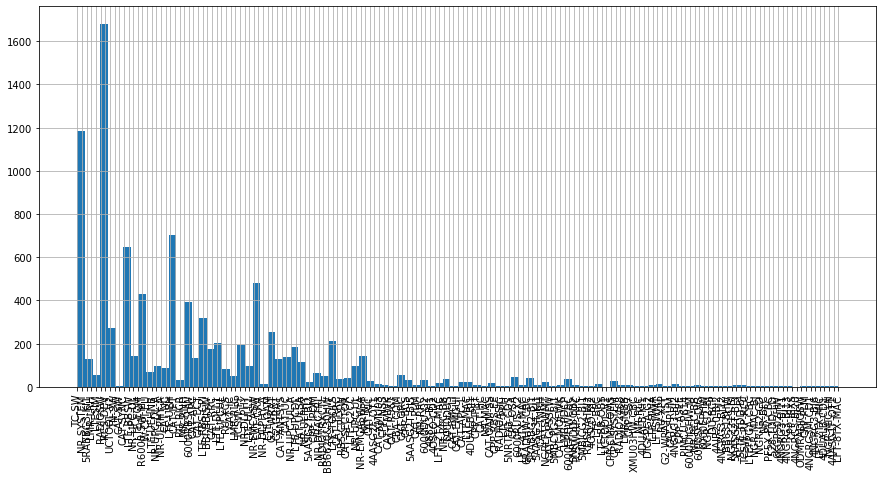

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
df_text['Faulty product.Design Responsible MHO'].hist(bins=100)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

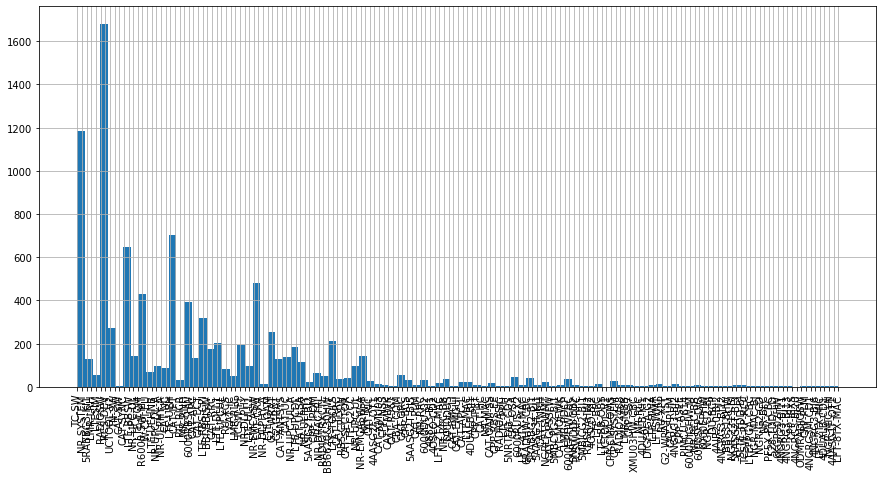

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
df_text['Faulty product.Design Responsible MHO'].hist(bins=100)
plt.xticks(rotation=90)

In [18]:
import json

f = open ('../Project_4_TS_Advisor/4G5G_trs_15500_MHO_Groups.json', "r")
data = json.loads(f.read())
#for key,value in data.items():
 #   print (key,value)

def get_key(val):
    for key, value in data.items():
        #print(val)
        if val in value or val == key:
            return key

last_column = df_text.iloc[:, -1].tolist()

#print("Last Column Of Dataframe : ")
#print(last_column)
#print('Type: ', type(last_column))

key_list =[]
for x in last_column:
    key_list.append(get_key(x))
    
#print(key_list)

df_text['SuperSet_MHO']=key_list

df_text

,General.Superior MHO,General.Heading,Observation.Observation,Answer.Answer,Faulty product.Design Responsible MHO,SuperSet_MHO
0,LTE-MS-RBS,"KDDI CD MTR20.39 IE ""Connected en-gNB to be Ad...",1.1 Trouble summary and/or commercial ...,CAUSE OF FAULT\n------------------------------...,TC-SW,TC-SW
1,LTE-MS-RBS,CD MTR 20.41 NR Active Drop KPI reduction MTR2...,1 E F F E C T \n============\n1.1 Trouble s...,CAUSE OF FAULT\n------------------------------...,NR-SYSTEM,NR-SYSTEM
2,ERS-BI,[G3 - BB6648]BB HW crashing simultaneously aft...,1 T R O U B L E D E S C R I P T I O N\n1.1. Tr...,SOLUTION/ANSWER AND MOTIVATION (IN BRIEF)\n===...,5RABBG3-KI1,Hardware
3,LTE-MS-RBS,"[MCT legacy] Reason: {test_case_failed,Expecte...",1 E F F E C T \n============\n1.1\tTrouble sum...,CAUSE OF FAULT\n------------------------------...,LMR-LRH,LTE-TCSW
4,DURA-TOOLS,Too high Ugly counters for mobile UEs with DL ...,1 Trouble description and commercial effect\n-...,1. Describe the solution from a system/test pe...,LTESIM,LTE-BBSW
...,...,...,...,...,...,...
9848,CPP-SUPER,System Limits Platform needs update of SCXB lo...,1 E F F E C T \n============\n1.1\tTrouble sum...,1. What is the problem we have worked with in ...,CPP-SYSTEM,CPP-PLM
9849,EXTERNTOOLS,AHL LMF9.8.0 - 4x4 MIMO Mixed CRS Connection S...,====================\nPROBLEM DESCRIPTION\n===...,"Hi,\n Information from Viavi:\n ""LS2_EXT optio...",LTE-TOOLS,LTE-TOOLS
9850,CPP-SUPER,8300: Fix EtHostDump coli output and remove pr...,1 E F F E C T \n============\n1.1\tTrouble sum...,1. What is the problem we have worked with in ...,CPP-IPET,CPP-PLM
9851,LTE-MS-RBS,PMD has been found during Power Cycle of Comb...,1 E F F E C T \n============\n1.1\tTrouble sum...,"As requested by Cable Zhang, this TR will be c...",ODMRADIOSW,RADIOSW


In [25]:
X.shape, y.shape

((9851, 4), (9851,))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

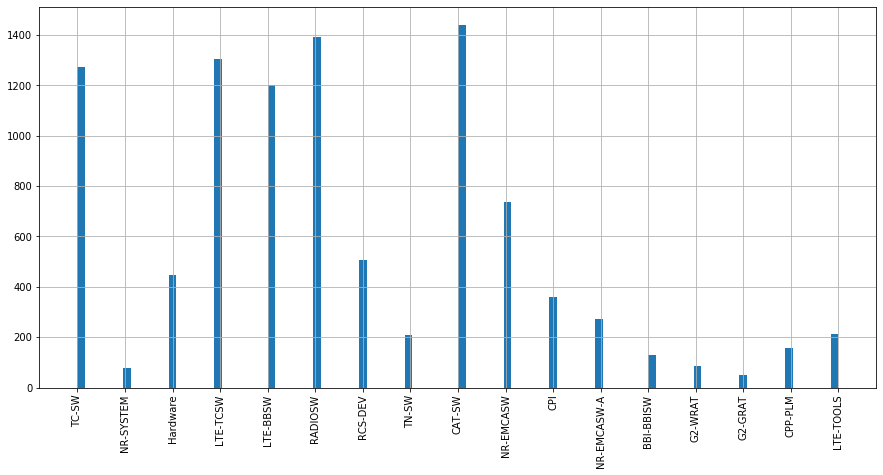

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
df_text['SuperSet_MHO'].hist(bins=100)
plt.xticks(rotation=90)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# X = df_text['General.Heading'] + '\n\n\n' + \
#     df_text['Trouble summary and/or commercial effect'] + '\n\n\n' + \
#     df_text['Observed System impact'] + '\n\n\n' + \
#     df_text['Detailed trouble description'] + '\n\n\n' + \
#     df_text['Project impact'] + '\n\n\n' + \
#     df_text['CAUSE OF FAULT'] + '\n\n\n' + \
#     df_text['FAULT DETECTION METHOD'] + '\n\n\n' + \
#     df_text['SOLUTION']

X = df_text['Observation.Observation'] + '\n\n\n' + \
    df_text['Answer.Answer']

y = df_text['SuperSet_MHO']

#X=vectorizer.fit_transform(X)
#Y_vect=vectorizer.fit_transform(X_train)

# Using processed data as independent variable and polarity as dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

# Extracting features using TFIDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1),
    analyzer='word', stop_words='english', lowercase=False, max_features=2000)

X_train_idf = vectorizer.fit_transform(X_train)
X_test_idf = vectorizer.transform(X_test)

# Getting IDF values
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(), columns=['idf_weights'])
# Sort ascending
df_idf = df_idf.sort_values(by=['idf_weights'], ascending=False)
df_idf

,idf_weights
168256_NEW_MARKET,9.279063
1551405_5GNB_SMC_CAPBLVD_5G_001,9.279063
0000000000000000_r,9.279063
G3_CI_MSR,9.279063
T0002154E0011009,9.279063
...,...
impact,1.237006
Workaround,1.222002
FAULT,1.197279
Frequency,1.169086


In [28]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
fit = svd.fit(X_train_idf)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.00851431 0.03408145 0.02191037 0.01362471 0.01323475]
[[ 0.14466438  0.00831958  0.01594272 ...  0.02431794  0.00665152
   0.00930406]
 [ 0.1439958   0.0007304   0.00550645 ... -0.02338497 -0.00520465
  -0.00609719]
 [-0.03361735  0.00803826  0.00686434 ... -0.01570945  0.00125579
   0.00036867]
 [ 0.10861531 -0.00380415 -0.01253225 ...  0.00372576  0.0019662
   0.00158083]
 [-0.28138386 -0.00268139 -0.02401191 ...  0.01122426  0.0027076
  -0.00120667]]


# Classifiers

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

mnb = MultinomialNB()
mnb.fit(X_train_idf, y_train)
pred_mnb = mnb.predict(X_test_idf)
print(len(pred_mnb))
acc = accuracy_score(y_test, pred_mnb)
print(acc)
results = pd.DataFrame([['Multinomial Naive Bayes', acc]], columns=['Model', 'Accuracy'])
results 

1971
0.6250634195839675


,Model,Accuracy
0,Multinomial Naive Bayes,0.625063


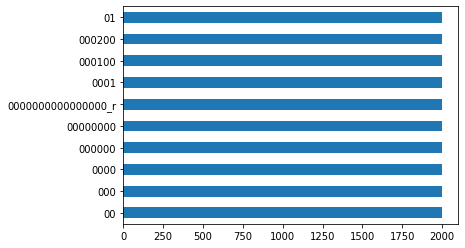

In [29]:
feature_importances = pd.Series(mnb.n_features_, index=vectorizer.get_feature_names())
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=19, max_depth=21, min_samples_split=2, min_samples_leaf=1, max_features='log2', random_state=0)
etc.fit(X_train_idf, y_train)
pred_etc = etc.predict(X_test_idf)
print(len(pred_etc))
acc = accuracy_score(y_test, pred_etc)
print(acc)
result_rfc = pd.DataFrame([['Extra Trees Classifier', acc]], columns=['Model', 'Accuracy'])
results = results.append(result_rfc, ignore_index=True)
results

1971
0.5063419583967529


,Model,Accuracy
0,Multinomial Naive Bayes,0.625063
1,Extra Trees Classifier,0.506342


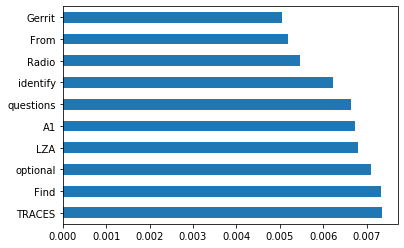

In [31]:
feature_importances = pd.Series(etc.feature_importances_, index=vectorizer.get_feature_names())
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_idf, y_train)
pred_dtc = dtc.predict(X_test_idf)
print(len(pred_dtc))
acc = accuracy_score(y_test, pred_dtc)
print(acc)
result_rfc = pd.DataFrame([['Decision Tree Classifier', acc]], columns=['Model', 'Accuracy'])
results = results.append(result_rfc, ignore_index=True)
results

1971
0.5910705225773719


,Model,Accuracy
0,Multinomial Naive Bayes,0.625063
1,Extra Trees Classifier,0.506342
2,Decision Tree Classifier,0.591071


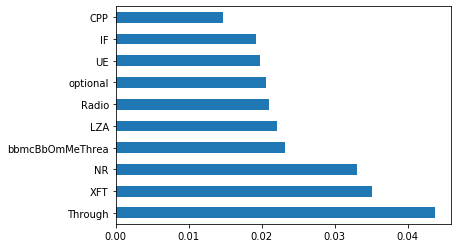

In [33]:
feature_importances = pd.Series(dtc.feature_importances_, index=vectorizer.get_feature_names())
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [34]:
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

orc = OneVsRestClassifier(dtc)
orc.fit(X_train_idf, y_train)
pred_orc = orc.predict(X_test_idf)
print(len(pred_orc))
# print(classification_report(y_test, pred_orc)
acc = accuracy_score(y_test, pred_orc)
print(acc)
result_rfc = pd.DataFrame([['One Vs Rest Classifier', acc]], columns=['Model', 'Accuracy'])
results = results.append(result_rfc, ignore_index=True)
results

1971
0.5169964485032978


,Model,Accuracy
0,Multinomial Naive Bayes,0.625063
1,Extra Trees Classifier,0.506342
2,Decision Tree Classifier,0.591071
3,One Vs Rest Classifier,0.516996


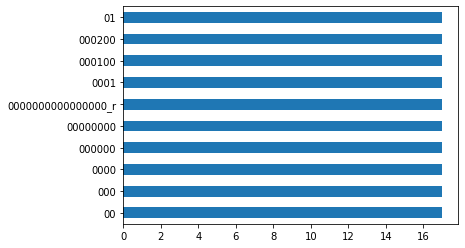

In [35]:
feature_importances = pd.Series(orc.n_classes_, index=vectorizer.get_feature_names())
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train_idf, y_train)
pred_rfc = rfc.predict(X_test_idf)
print(len(pred_rfc))
acc = accuracy_score(y_test, pred_rfc)
print(acc)
result_rfc = pd.DataFrame([['Random Forest (Entropy)', acc]], columns=['Model', 'Accuracy'])
results = results.append(result_rfc, ignore_index=True)
results 

1971
0.7407407407407407


,Model,Accuracy
0,Multinomial Naive Bayes,0.625063
1,Extra Trees Classifier,0.506342
2,Decision Tree Classifier,0.591071
3,One Vs Rest Classifier,0.516996
4,Random Forest (Entropy),0.740741


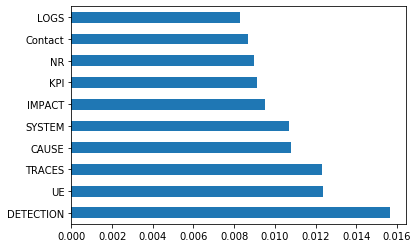

In [40]:
feature_importances = pd.Series(rfc.feature_importances_, index=vectorizer.get_feature_names())
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_idf, y_train)
pred_xgb = xgb.predict(X_test_idf)
print(len(pred_xgb))
acc = accuracy_score(y_test, pred_xgb)
print(acc)
result_rfc = pd.DataFrame([['XG Boost Classifier', acc]], columns=['Model', 'Accuracy'])
results = results.append(result_rfc, ignore_index=True)
results

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:53:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1971
0.8178589548452562


,Model,Accuracy
0,Multinomial Naive Bayes,0.625063
1,Extra Trees Classifier,0.506342
2,Decision Tree Classifier,0.591071
3,One Vs Rest Classifier,0.516996
4,XG Boost Classifier,0.817859


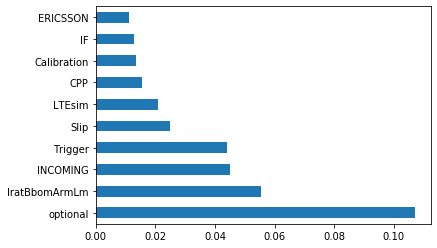

In [37]:
feature_importances = pd.Series(xgb.feature_importances_, index=vectorizer.get_feature_names())
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [40]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

skb = SelectKBest(score_func=chi2, k=200)
skb.fit(X_train_idf, y_train)
# print(skb.get_support(True))

# pred_skb = skb.predict(X_test_idf)
# print(len(pred_skb))
# acc = accuracy_score(y_test, pred_skb)
# print(acc)
X1 = skb.transform(X_train_idf)
X2 = skb.transform(X_test_idf)

X1.shape, X2.shape

((7880, 200), (1971, 200))

In [43]:
X_train_idf.shape, X_test_idf.shape

((7880, 2000), (1971, 2000))

In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm = SelectFromModel(estimator=LogisticRegression())
sfm.fit(X_train_idf, y_train)
X_train_idf_new = sfm.transform(X_train_idf)
X_test_idf_new = sfm.transform(X_test_idf)
X_train_idf_new.shape, X_test_idf_new.shape

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


((7880, 791), (1971, 791))

In [45]:
y_train.shape, y_test.shape

((7880,), (1971,))

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

mnb2 = MultinomialNB()
mnb2.fit(X_train_idf_new, y_train)
pred_mnb2 = mnb2.predict(X_test_idf_new)
print(len(pred_mnb2))
acc = accuracy_score(y_test, pred_mnb2)
print(acc)
results = pd.DataFrame([['Multinomial Naive Bayes', acc]], columns=['Model', 'Accuracy'])
results 

1971
0.6276002029426687


,Model,Accuracy
0,Multinomial Naive Bayes,0.6276


In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(criterion='entropy')
rfc2.fit(X_train_idf_new, y_train)
pred_rfc2 = rfc2.predict(X_test_idf_new)
print(len(pred_rfc2))
acc = accuracy_score(y_test, pred_rfc2)
print(acc)
result_rfc = pd.DataFrame([['Random Forest (Entropy)', acc]], columns=['Model', 'Accuracy'])
results = results.append(result_rfc, ignore_index=True)
results 

1971
0.7524099441907661


,Model,Accuracy
0,Multinomial Naive Bayes,0.62760
1,Random Forest (Entropy),0.75241


In [55]:
from xgboost import XGBClassifier

xgb2 = XGBClassifier()
xgb2.fit(X_train_idf_new, y_train)
pred_xgb2 = xgb2.predict(X_test_idf_new)
print(len(pred_xgb2))
acc = accuracy_score(y_test, pred_xgb2)
print(acc)
result_rfc = pd.DataFrame([['XG Boost Classifier', acc]], columns=['Model', 'Accuracy'])
results = results.append(result_rfc, ignore_index=True)
results

C:\Users\eshuvmu\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[19:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1971
0.8229325215626585


,Model,Accuracy
0,Multinomial Naive Bayes,0.627600
1,Random Forest (Entropy),0.752410
2,XG Boost Classifier,0.822933


In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

xgb2 = XGBClassifier()
xgb2.fit(X_train_idf_new, y_train)
pred_xgb2 = xgb2.predict(X_test_idf_new)
print(len(pred_xgb2))
acc = accuracy_score(y_test, pred_xgb2)
print(acc)

print ('\nClasification report:\n', classification_report(y_test, pred_xgb2))
print ('\nConfusion matrix:\n',confusion_matrix(y_test, pred_xgb2))

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:26:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1971
0.8229325215626585

Clasification report:
               precision    recall  f1-score   support

   BBI-BBISW       1.00      0.85      0.92        27
      CAT-SW       0.79      0.79      0.79       307
         CPI       0.95      0.95      0.95        92
     CPP-PLM       1.00      0.93      0.97        30
     G2-GRAT       0.43      0.25      0.32        12
     G2-WRAT       0.71      0.45      0.56        11
    Hardware       0.92      0.87      0.89        97
    LTE-BBSW       0.85      0.81      0.83       254
    LTE-TCSW       0.74      0.85      0.79       209
   LTE-TOOLS       0.98      0.96      0.97        46
   NR-EMCASW       0.88      0.86      0.87       139
 NR-EMCASW-A       0.76      0.59      0.67       

In [76]:
y_test

2454       CAT-SW
3612        TN-SW
7923        TC-SW
290      LTE-BBSW
2019       CAT-SW
          ...    
2487     LTE-TCSW
6644     LTE-TCSW
8247    BBI-BBISW
5623       CAT-SW
4488    NR-SYSTEM
Name: SuperSet_MHO, Length: 1971, dtype: object

In [111]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

import numpy as np

import matplotlib.pyplot as plt

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train_idf_new, y_train)
pred = clf.predict(X_test_idf_new)
pred_prob = clf.decision_function(X_test_idf_new)

fpr = {}
tpr = {}
thresh ={}

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

print(pred[1])
print(y_test[1])
print(pred_prob.shape)

fpr = {}
tpr = {}
thresh ={}
le = preprocessing.LabelEncoder()

Y_new=df_text['SuperSet_MHO']

le.fit(Y_new)

y_test_le_encode=le.transform(y_test)
y_pred_le_encode=le.transform(pred)

print(y_test_le_encode[1])
print(y_pred_le_encode[1])

print(len(le.classes_))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
roc_auc_score(y_test_le_encode, y_pred_le_encode,average="ovr")


TN-SW
NR-SYSTEM
(1971, 17)
16
16
17


ValueError: multi_class must be in ('ovo', 'ovr')

(1971,)
<class 'pandas.core.series.Series'>
(1971, 17)
[0.00000000e+00 5.07356672e-04 6.36225266e-01 6.37239980e-01
 6.64129883e-01 6.65144597e-01 8.75697615e-01 8.76712329e-01
 9.00050736e-01 9.01065449e-01 9.55352613e-01 9.56367326e-01
 1.00000000e+00]
[nan nan nan nan nan nan nan nan nan nan nan nan nan]
[-0.83585368 -1.83585368 -5.05224709 -5.05300124 -5.10551008 -5.11090773
 -5.47350275 -5.47355266 -5.53438626 -5.5363761  -5.71730721 -5.71852116
 -6.13950373]
[0.00000000e+00 5.07356672e-04 1.52207002e-03 2.53678336e-03
 8.11770675e-03 9.13242009e-03 1.26839168e-02 1.36986301e-02
 1.42059868e-02 1.52207002e-02 7.76255708e-02 7.86402841e-02
 1.00000000e+00]
[nan nan nan nan nan nan nan nan nan nan nan nan nan]
[ 4.87102157  3.87102157  3.44796891  3.32341679  2.36851058  2.27770343
  1.95984865  1.89926222  1.88776168  1.82619889 -0.36822032 -0.36981755
 -6.58242841]
[0.00000000e+00 5.07356672e-04 8.06697108e-02 8.16844242e-02
 1.50684932e-01 1.51699645e-01 2.24759006e-01 2.25773719

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/

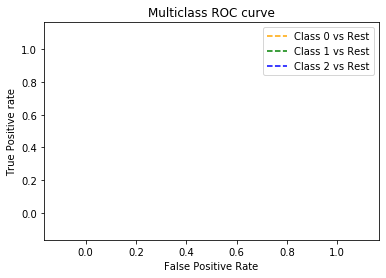

In [75]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train_idf_new, y_train)
pred = clf.predict(X_test_idf_new)
pred_prob = clf.decision_function(X_test_idf_new)

print(y_test.shape)
print(type(y_test))
print(pred_prob.shape)

fpr = {}
tpr = {}
thresh ={}

for i in range(len(pred_prob[1])):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    print(fpr[i])
    print(tpr[i])
    print(thresh[i])



plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [164]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []


print(X_train_idf.shape)
for train_index, test_index in skf.split(X_train_idf_new, y_train):
    x_train_fold, x_test_fold = X_train_idf_new[train_index], X_train_idf_new[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

print(lst_accu_stratified)


(7880, 2000)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.6928934010152284, 0.6370558375634517, 0.684010152284264, 0.6573604060913706, 0.6738578680203046, 0.6713197969543148, 0.6763959390862944, 0.6814720812182741, 0.6878172588832487, 0.6598984771573604]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
# Create  classifier object.
lr = XGBClassifier()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []


print(X_train_idf.shape)
for train_index, test_index in skf.split(X_train_idf_new, y_train):
    x_train_fold, x_test_fold = X_train_idf_new[train_index], X_train_idf_new[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

print(lst_accu_stratified)


(7880, 2000)


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:56:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:57:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:58:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:59:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:59:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:00:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:01:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:02:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:02:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:03:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.7779187817258884, 0.8020304568527918, 0.8096446700507615, 0.8058375634517766, 0.833756345177665, 0.7906091370558376, 0.7918781725888325, 0.800761421319797, 0.815989847715736, 0.817258883248731]


In [166]:
max(lst_accu_stratified)

0.833756345177665

In [168]:
sum(lst_accu_stratified)/len(lst_accu_stratified)

0.8045685279187819

In [50]:
df_pred = pd.DataFrame(pred_xgb)
df_pred.to_csv('../Project_4_TS_Advisor/4G5G_trs_15500_MHO_Predict.csv', index=False, header=False)
print(len(pred_xgb))

1971


In [ ]:
# Count Vectorizar,  F1, Recall & Precision, K-Fold